In [1]:
import pandas as pd
import numpy as np

In [2]:
trip = pd.read_csv('data/tripP')
train = pd.read_csv('data/trip_train.csv', usecols=['id'])
test = pd.read_csv('data/trip_test.csv', usecols=['id'])

/home/pabloernesto/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train = train.merge(trip, on='id', how='left')
test = test.merge(trip, on='id', how='left')

In [4]:
train.head(1)

,id,duration,date,start_station_id,subscription_type,time,year,month,day,dayofweek,date.1,holiday
0,907649,396,2015-08-27,50,1,516,2015,8,27,4,NaN,NaN


In [79]:
from sklearn.manifold import TSNE
s = trip[['duration','start_station_id','subscription_type','time','year','month','day','dayofweek']].sample(3000)
#t = TSNE().fit_transform(trip[['duration','start_station_id','time','year','month','day','dayofweek']])
transformed = TSNE(n_components=2).fit_transform(s)
transformed

array([[ -4.96738706, -15.39469033],
       [ -6.2479636 , -14.88027982],
       [ -4.6216562 ,   3.41486156],
       ..., 
       [ -7.16854513, -14.98711886],
       [-10.4981349 ,   2.75214597],
       [  1.25599564,  -2.32516118]])

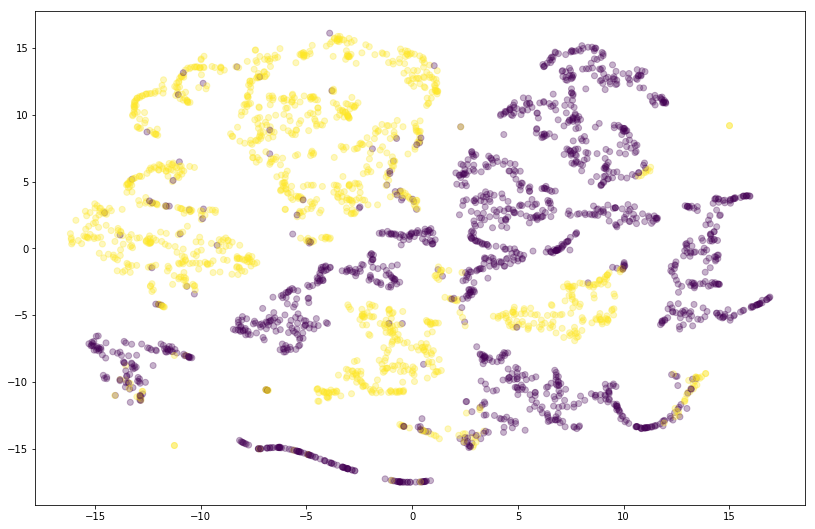

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
t = pd.DataFrame(transformed)
x, y = t.iloc[:,0], t.iloc[:,1]
fig = plt.figure(figsize=(80, 20))
ax = fig.add_subplot(251)
ax.scatter(x, y, c=(s.time/60 < 15)&(s.subscription_type == 1), alpha=0.3)

In [50]:
trip.columns

Index([u'id', u'duration', u'date', u'start_station_id', u'subscription_type',
       u'time', u'year', u'month', u'day', u'dayofweek', u'date.1',
       u'holiday'],
      dtype='object')